**ShopEasy Project**

Imagine a platform named ShopEasy, a leading e-commerce site that sells a variety of products, from
books and gadgets to furniture and fashion. Over the years, they have amassed a vast amount of user
data. This data is a gold mine of insights waiting to be discovered. ShopEasy aims to provide
personalized user experiences, special promotions, and improved services. But to do this effectively,
they first need to understand the buying habits and behaviors of their customers. By applying
segmentation to this dataset, ShopEasy aims to uncover these hidden patterns and provide an
enhanced, personalized shopping experience for its users.

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
shopeasy_data = pd.read_csv('/Users/janstein/Documents/DEV/ML_Project/shopEasy.csv')
shopeasy_data.head()

,personId,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,...,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,location,accountType,webUsage
0,C10573,1034.660626,0.833333,1308.11,1308.11,0.00,234.602843,0.500000,0.500000,0.000000,...,1,8,1500.0,236.764555,207.007715,0.00,6,New York,Premium,60
1,C16889,777.853474,0.666667,0.00,0.00,0.00,1820.143378,0.000000,0.000000,0.000000,...,8,0,2000.0,89.741508,173.276205,0.00,6,Los Angeles,Premium,5
2,C12964,97.453056,0.818182,334.73,334.73,0.00,19.551802,0.083333,0.083333,0.000000,...,1,1,2500.0,234.271939,117.297542,0.25,12,New York,Student,21
3,C11171,0.000000,0.000000,12.65,0.00,12.65,0.000000,0.083333,0.000000,0.083333,...,0,1,5000.0,0.000000,NaN,0.00,12,Chicago,Premium,53
4,C17582,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,...,0,1,1500.0,118.438703,54.138711,0.00,6,New York,Premium,59


**Description of the Dataset**

- **personId**: Unique identifier for each user on the platform

- **accountTotal**: Total amount spent by the user on ShopEasy since their registration

- **frequencyIndex**: Reflects how frequently the user shops, with 1 being very frequent and values less than 1 being less frequent
- **itemCosts**: Total costs of items purchased by the user
- **singleItemCosts**: Costs of items that the user bought in a single purchase without opting for installments
- **multipleItemCosts**: Costs of items that the user decided to buy in installments
- **emergencyFunds**: Amount that the user decided to keep as a backup in their ShopEasy wallet for faster checkout or emergency purchases
- **itemBuyFrequency**: Frequency with which the user makes purchases
- **singleItemBuyFrequency**: How often the user makes single purchases without opting for installments
- **multipleItemBuyFrequency**: How often the user opts for installment-based purchases
- **emergencyUseFrequency**: How frequently the user taps into their emergency funds
- **emergencyCount**: Number of times the user has used their emergency funds
- **itemCount**: Total number of individual items purchased by the user
- **maxSpendLimit**: The maximum amount the user can spend in a single purchase, set by ShopEasy based on user's buying behavior and loyalty
- **monthlyPaid**: Total amount paid by the user every month
- **leastAmountPaid**: The least amount paid by the user in a single transaction
- **paymentCompletionRate**: Percentage of purchases where the user has paid the full amount
- **accountLifespan**: Duration for which the user has been registered on ShopEasy
- **location**: User's city or region
- **accountType**: The type of account held by the user. Regular for most users, Premium for those who have subscribed to ShopEasy premium services, and Student for users who have registered with a student ID
- **webUsage**: A metric (0-100) indicating the frequency with which the user shops on ShopEasy via web browsers. A higher number indicates more frequent web usage

### Scope

For this assignment we're interested in investigating the relationship between the amount of money spent and the volume of products purchased, to better understand if customers are high/low value customers because of the cost of items purchased, or because of the amount of (cheap?) items purchased.

Therefore, and because of the size of the dataset, we have chosen to eliminate variables that are not relevant for this investigation.

### Columns to be cut

1. **paymentCompletionRate:** because it is a payment option related variable
2. **maxSpendLimit:** because it is already represented through spending, which is represented in monthly paid
3. **emergencyCount:** because it just reflects the customers preferred payment option, which is irrelevant for this investigation
4. **emergencyUseFrequency:** because of the same reason
5. **emergencyFunds:** because of the same reason
6. **singleItemCosts:** because they are only related to payment option
7. **MultipleItemCosts:** because they are only related to payment option
8. **singleItemBuyFrequency:** because they are only related to payment option
9. **multipleItemBuyFrequency:** because they are only related to payment option
10. **personId:** This variable is just an internal customer ID and does not matter for our purposes



In [106]:
drop_columns = ['paymentCompletionRate', 'maxSpendLimit', 'emergencyCount', 'emergencyUseFrequency', 'emergencyFunds', 'singleItemCosts', 'multipleItemCosts', 'singleItemBuyFrequency', 'multipleItemBuyFrequency', 'personId']

shopeasy_data_dropped = shopeasy_data.drop(drop_columns, axis=1)

shopeasy_data_dropped.head()

,accountTotal,frequencyIndex,itemCosts,itemBuyFrequency,itemCount,monthlyPaid,leastAmountPaid,accountLifespan,location,accountType,webUsage
0,1034.660626,0.833333,1308.11,0.500000,8,236.764555,207.007715,6,New York,Premium,60
1,777.853474,0.666667,0.00,0.000000,0,89.741508,173.276205,6,Los Angeles,Premium,5
2,97.453056,0.818182,334.73,0.083333,1,234.271939,117.297542,12,New York,Student,21
3,0.000000,0.000000,12.65,0.083333,1,0.000000,NaN,12,Chicago,Premium,53
4,18.120946,0.500000,57.00,0.166667,1,118.438703,54.138711,6,New York,Premium,59


### Descriptive Statistics
Descriptive statistics will give us an insight into the central tendency, dispersion, and shape of the dataset's distribution.

In [107]:
# Descriptive statistics for the dataset
shopeasy_data_dropped.describe().T

,count,mean,std,min,25%,50%,75%,max
accountTotal,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
frequencyIndex,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
itemCosts,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
itemBuyFrequency,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
itemCount,8950.0,14.709832,24.857649,0.000000,1.000000,7.000000,17.000000,358.00000
monthlyPaid,8950.0,1733.143852,2895.063757,0.000000,383.276166,856.901546,1901.134317,50721.48336
leastAmountPaid,8637.0,864.206542,2372.446607,0.019163,169.123707,312.343947,825.485459,76406.20752
accountLifespan,8950.0,11.517318,1.338331,6.000000,12.000000,12.000000,12.000000,12.00000
webUsage,8950.0,49.422570,28.808219,0.000000,24.000000,49.000000,74.000000,99.00000


### Strange min values

**Some columns contain the value 0 in places that should disqualify them from our dataset. These are:**
- **accountTotal:** because this would mean they have not spent any money
- **itemCosts:** because this would mean they have not purchased any items
- **itemCount:** because this would mean they have not purchased any items
- **monthlyPaid:** because this would mean they have not spent any money

These are likely either customers who have never bough anything, or some sort of replacement for missing values. Either way, they should not be in our dataset.


In [108]:
columns_to_check = ['accountTotal', 'itemCosts', 'itemCount', 'monthlyPaid']

# Counting zeros in each specified column
zero_counts = {col: (shopeasy_data_dropped[col] == 0).sum() for col in columns_to_check}

print(zero_counts)

# Creating a combined mask for rows with zeros in our specified columns
combined_mask = (shopeasy_data_dropped[columns_to_check] == 0).any(axis=1)

# Counting the number of rows that have zeros in any of our specified columns
count_of_rows_with_zeros = combined_mask.sum()

print(f"Number of rows with at least one zero in the specified columns: {count_of_rows_with_zeros}")

{'accountTotal': 80, 'itemCosts': 2044, 'itemCount': 2044, 'monthlyPaid': 240}
Number of rows with at least one zero in the specified columns: 2258


**Since these values are from customers who have not made purchases they are not relevant for our investigation. We have therefore chosen to remove them**

In [109]:
# Creating a boolean mask for rows with zeros in any of our columns
mask = (shopeasy_data_dropped[columns_to_check] == 0).any(axis=1)

# Dropping rows where any of the specified columns have a zero
shopeasy_data_cleaned = shopeasy_data_dropped[~mask]

shopeasy_data_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
accountTotal,6692.0,1416.932266,2051.301368,0.000199,94.109595,645.116715,1817.267282,19043.13856
frequencyIndex,6692.0,0.890648,0.213067,0.090909,0.909091,1.000000,1.000000,1.00000
itemCosts,6692.0,1324.745744,2379.912658,0.010000,250.690000,612.165000,1497.355000,49039.57000
itemBuyFrequency,6692.0,0.641771,0.338751,0.083333,0.333333,0.727273,1.000000,1.00000
itemCount,6692.0,19.423042,27.072262,1.000000,5.000000,12.000000,23.000000,358.00000
monthlyPaid,6692.0,1802.664865,2953.545784,0.056466,424.771307,929.523895,2002.639778,50721.48336
leastAmountPaid,6660.0,823.218847,2295.170667,0.019163,162.248363,247.181815,763.169012,76406.20752
accountLifespan,6692.0,11.584130,1.249100,6.000000,12.000000,12.000000,12.000000,12.00000
webUsage,6692.0,49.315750,28.800915,0.000000,24.000000,50.000000,74.000000,99.00000


#### The info() Method
The info() method is used to get a concise summary of the DataFrame. This method is useful for quickly understanding the structure of the dataset, including the following aspects:

- ***Index Range*** Shows the range of the index and the total number of entries in the DataFrame.
- ***Column Names*** Lists all column names in the DataFrame.
- ***Non-Null Counts*** Indicates the number of non-missing (non-null) values for each column. This is crucial for identifying columns with missing data.
- ***Data Types*** Shows the data type of each column (e.g., integer, float, object (string), bool, etc.).
- ***Memory Usage*** Provides information on the memory usage of the DataFrame, which can be important for processing large datasets.

Using info(), you can quickly assess which columns may require type conversion or additional preprocessing due to null values or incorrect data types.

In [110]:
# Using info() to get the dataset summary
shopeasy_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6692 entries, 0 to 8949
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   accountTotal      6692 non-null   float64
 1   frequencyIndex    6692 non-null   float64
 2   itemCosts         6692 non-null   float64
 3   itemBuyFrequency  6692 non-null   float64
 4   itemCount         6692 non-null   int64  
 5   monthlyPaid       6692 non-null   float64
 6   leastAmountPaid   6660 non-null   float64
 7   accountLifespan   6692 non-null   int64  
 8   location          6692 non-null   object 
 9   accountType       6692 non-null   object 
 10  webUsage          6692 non-null   int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 627.4+ KB


#### The isnull().sum() Method
The isnull().sum() method is a two-step operation specifically geared towards identifying missing values in the DataFrame:

- ***isnull()*** This part of the method checks each cell in the DataFrame and returns a DataFrame of the same size with boolean values: True if the original cell is null (or NaN), and False otherwise.
- ***sum()*** This part sums up the number of True values (null values) for each column, giving you a total count of missing values in each column.

This method is particularly useful for data cleaning and preprocessing, as handling missing values is a critical step in preparing data for analysis or modeling.

In [111]:
# Using isnull().sum() to count missing values in each column
shopeasy_data_cleaned.isnull().sum()

accountTotal         0
frequencyIndex       0
itemCosts            0
itemBuyFrequency     0
itemCount            0
monthlyPaid          0
leastAmountPaid     32
accountLifespan      0
location             0
accountType          0
webUsage             0
dtype: int64

**There are a few missing values in leastAmountPaid. We have therefore decided to drop these rows.**

In [112]:
df = shopeasy_data_cleaned.dropna(subset=['leastAmountPaid'])

df.isna().sum()

accountTotal        0
frequencyIndex      0
itemCosts           0
itemBuyFrequency    0
itemCount           0
monthlyPaid         0
leastAmountPaid     0
accountLifespan     0
location            0
accountType         0
webUsage            0
dtype: int64

## Feature Engineering

The dataset includes variables for total amount of money spent (accountTotal), total amount of items purchased (itemCount), total cost of those items (itemCosts) and an average monthly spending variable (monthlyPaid). It does however not include a variable for the average item cost.

We add a variable for average item cost (**avgItemCost**) by dividing the itemCosts by itemCount

In [113]:
df['avgItemCost'] = df['itemCosts'] / df['itemCount']

df.describe().T

/var/folders/fm/ybz48djs4wvgqr5vc1m27t3w0000gn/T/ipykernel_2137/1739923190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avgItemCost'] = df['itemCosts'] / df['itemCount']


,count,mean,std,min,25%,50%,75%,max
accountTotal,6660.0,1423.688363,2053.900836,0.000199,96.054026,656.505045,1820.422544,19043.138560
frequencyIndex,6660.0,0.893484,0.208525,0.090909,0.909091,1.000000,1.000000,1.000000
itemCosts,6660.0,1328.882601,2384.573169,0.010000,251.470000,616.335000,1500.000000,49039.570000
itemBuyFrequency,6660.0,0.642498,0.338338,0.083333,0.333333,0.727273,1.000000,1.000000
itemCount,6660.0,19.487688,27.118690,1.000000,5.000000,12.000000,23.000000,358.000000
monthlyPaid,6660.0,1802.277373,2938.241746,0.056466,426.220917,934.302207,2007.325216,50721.483360
leastAmountPaid,6660.0,823.218847,2295.170667,0.019163,162.248363,247.181815,763.169012,76406.207520
accountLifespan,6660.0,11.585435,1.246854,6.000000,12.000000,12.000000,12.000000,12.000000
webUsage,6660.0,49.301502,28.817858,0.000000,24.000000,50.000000,74.000000,99.000000
avgItemCost,6660.0,93.799277,165.472480,0.010000,33.220000,55.523469,94.550107,5981.666667


## Analyzing Outliers

#### Numerical Variables

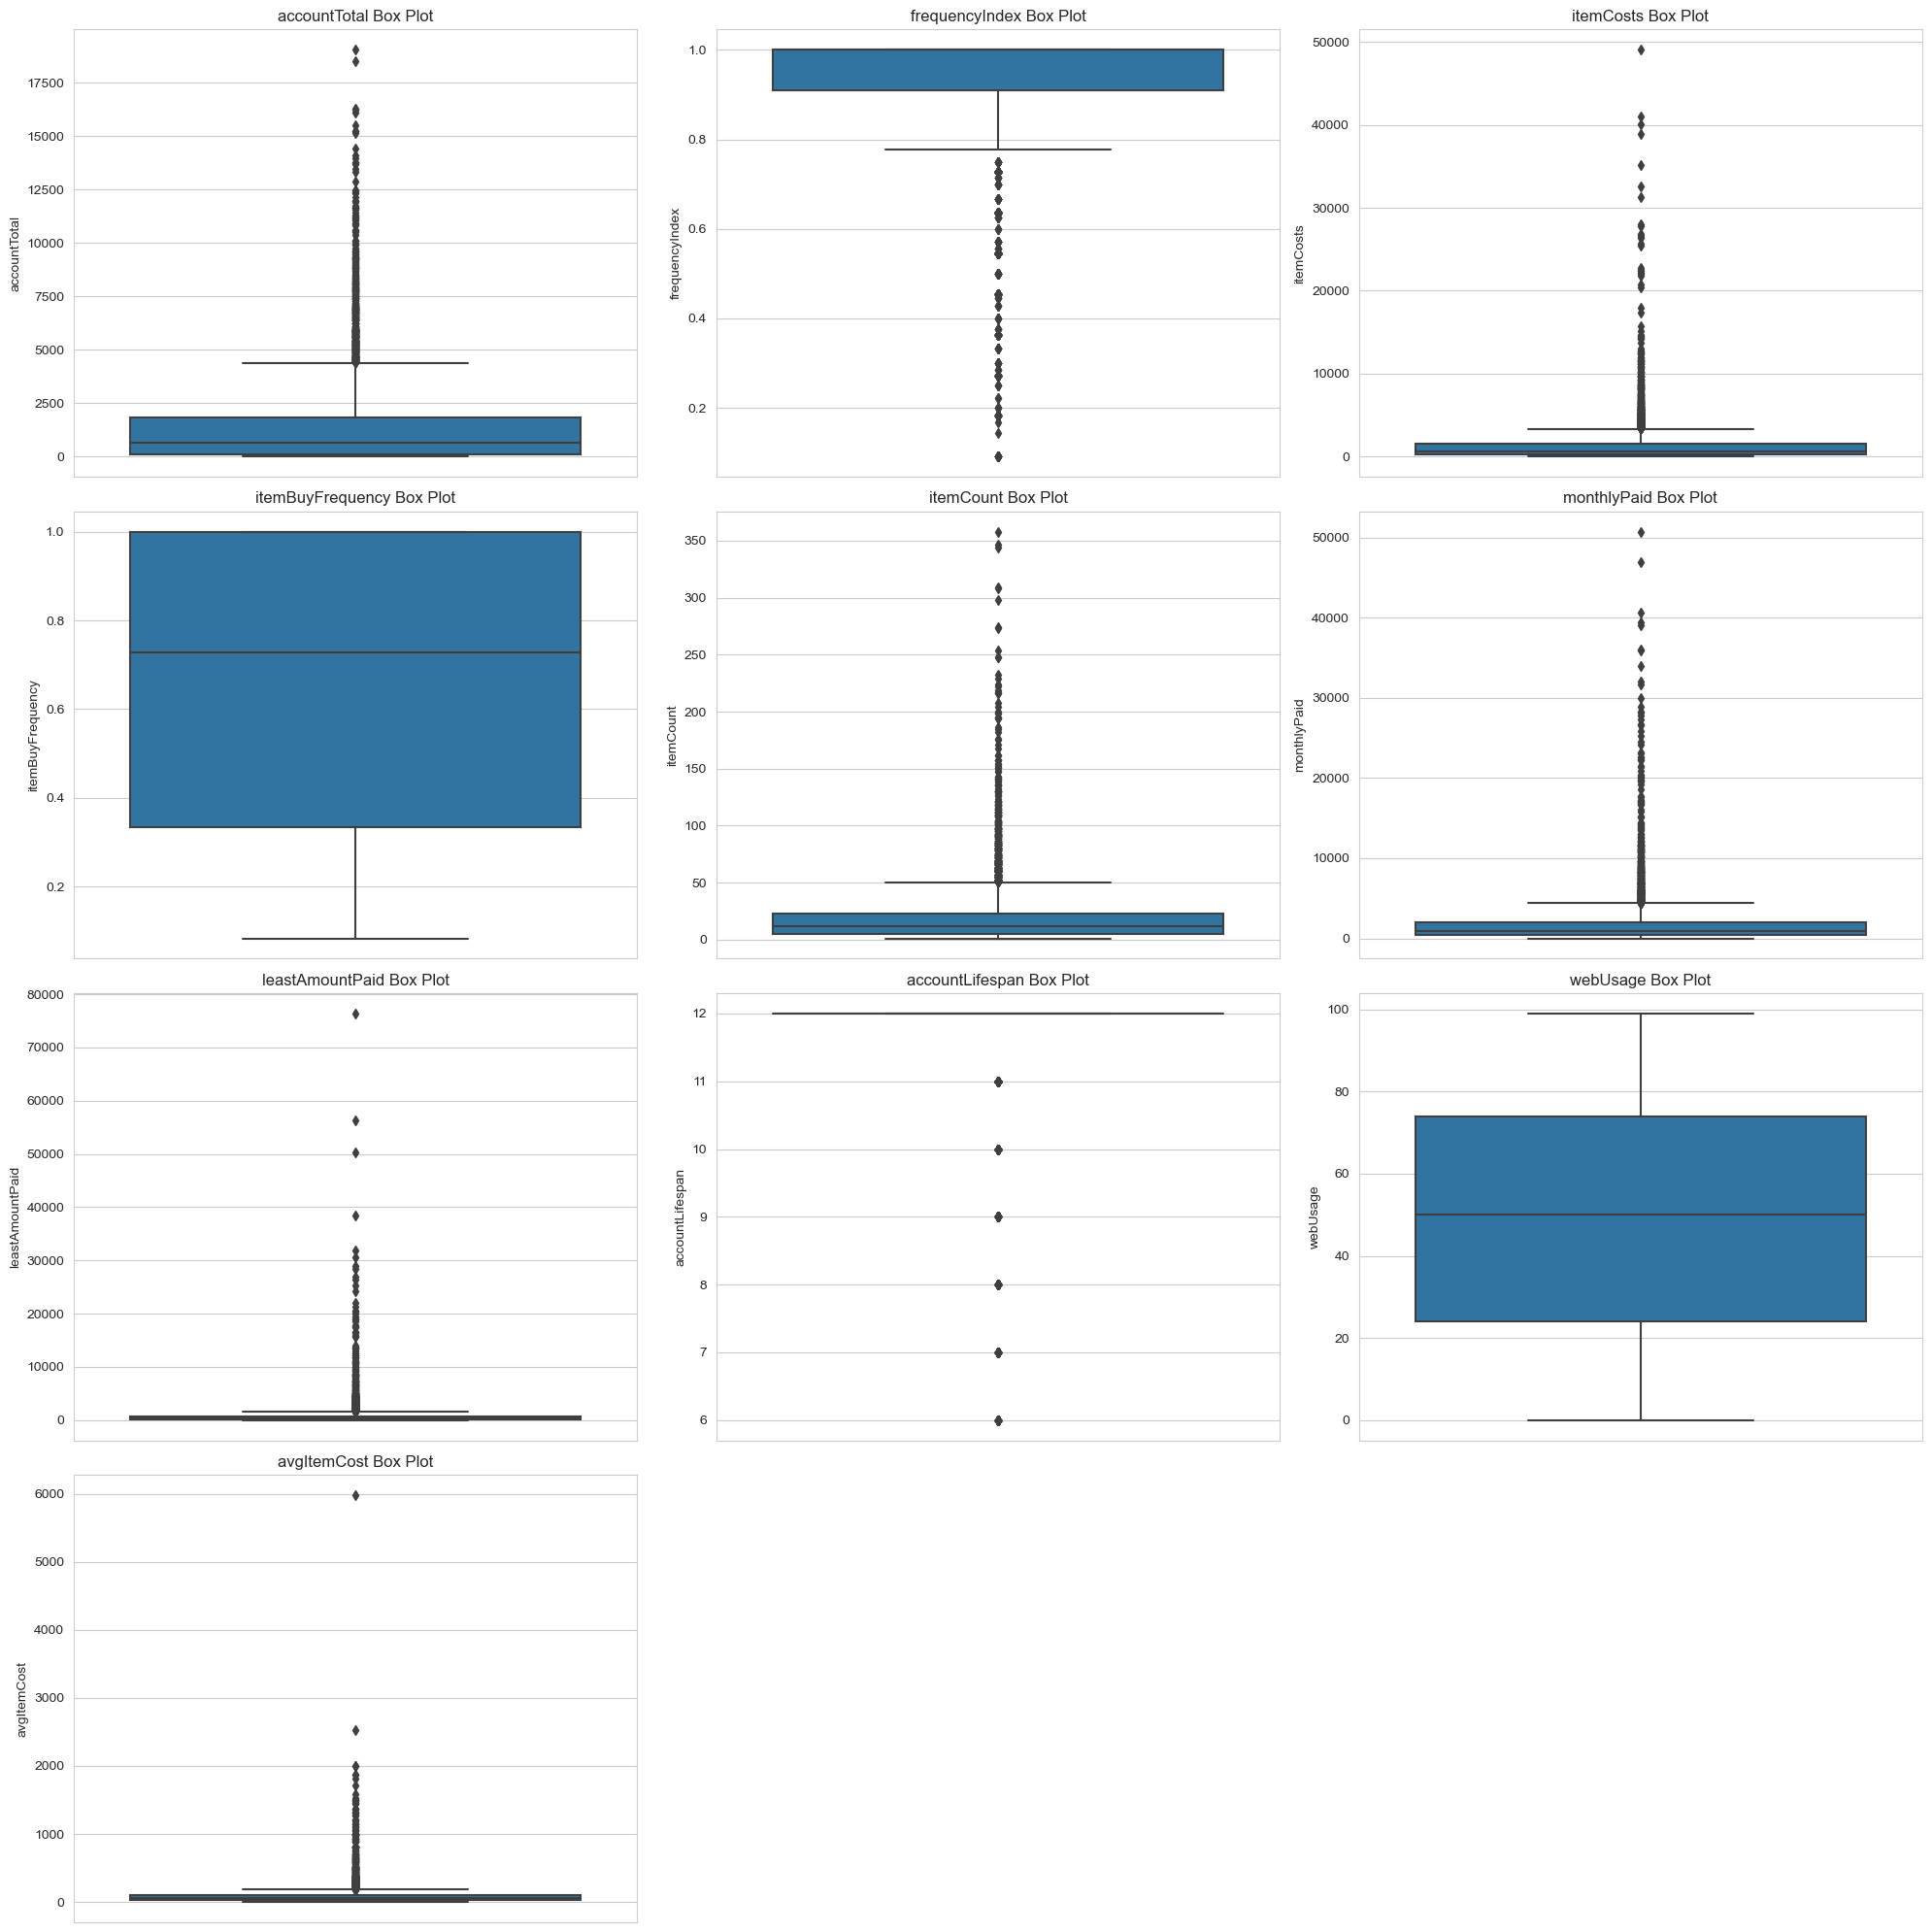

In [114]:
# Filter out only numerical columns for plotting
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Ceil division

# Setting up the figure
plt.figure(figsize=(20, n_rows * 5))  # Adjust size as needed

# Loop through the numerical columns and create a subplot for each
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"{col} Box Plot")

plt.tight_layout()
plt.show()

#### Analysis of Categorical Variables

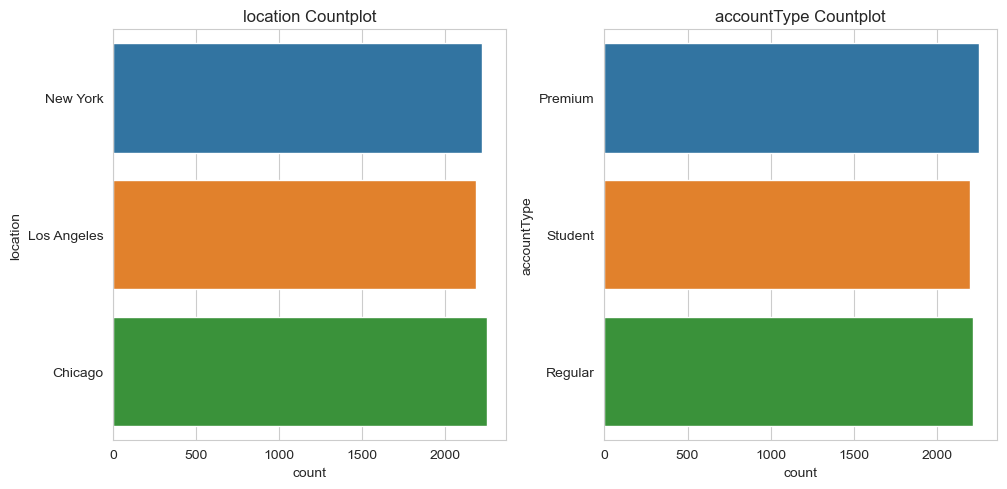

In [115]:
# Filter out only categorical columns for plotting

categorical_cols = df.select_dtypes(include=['object']).columns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Number of rows and columns for the subplot grid
n_cols = 4  # You can adjust this based on your preference
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # Ceil division

# Setting up the figure
plt.figure(figsize=(20, n_rows * 5))  # Adjust size as needed

# Loop through the categorical columns and create a subplot for each
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(y=df[col])
    plt.title(f"{col} Countplot")

plt.tight_layout()
plt.show()


## Univariate Analysis
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words, your data has only one variable. It doesn’t deal with causes or relationships and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

### Analysis of Numerical Features
Let's analyze the numerical features

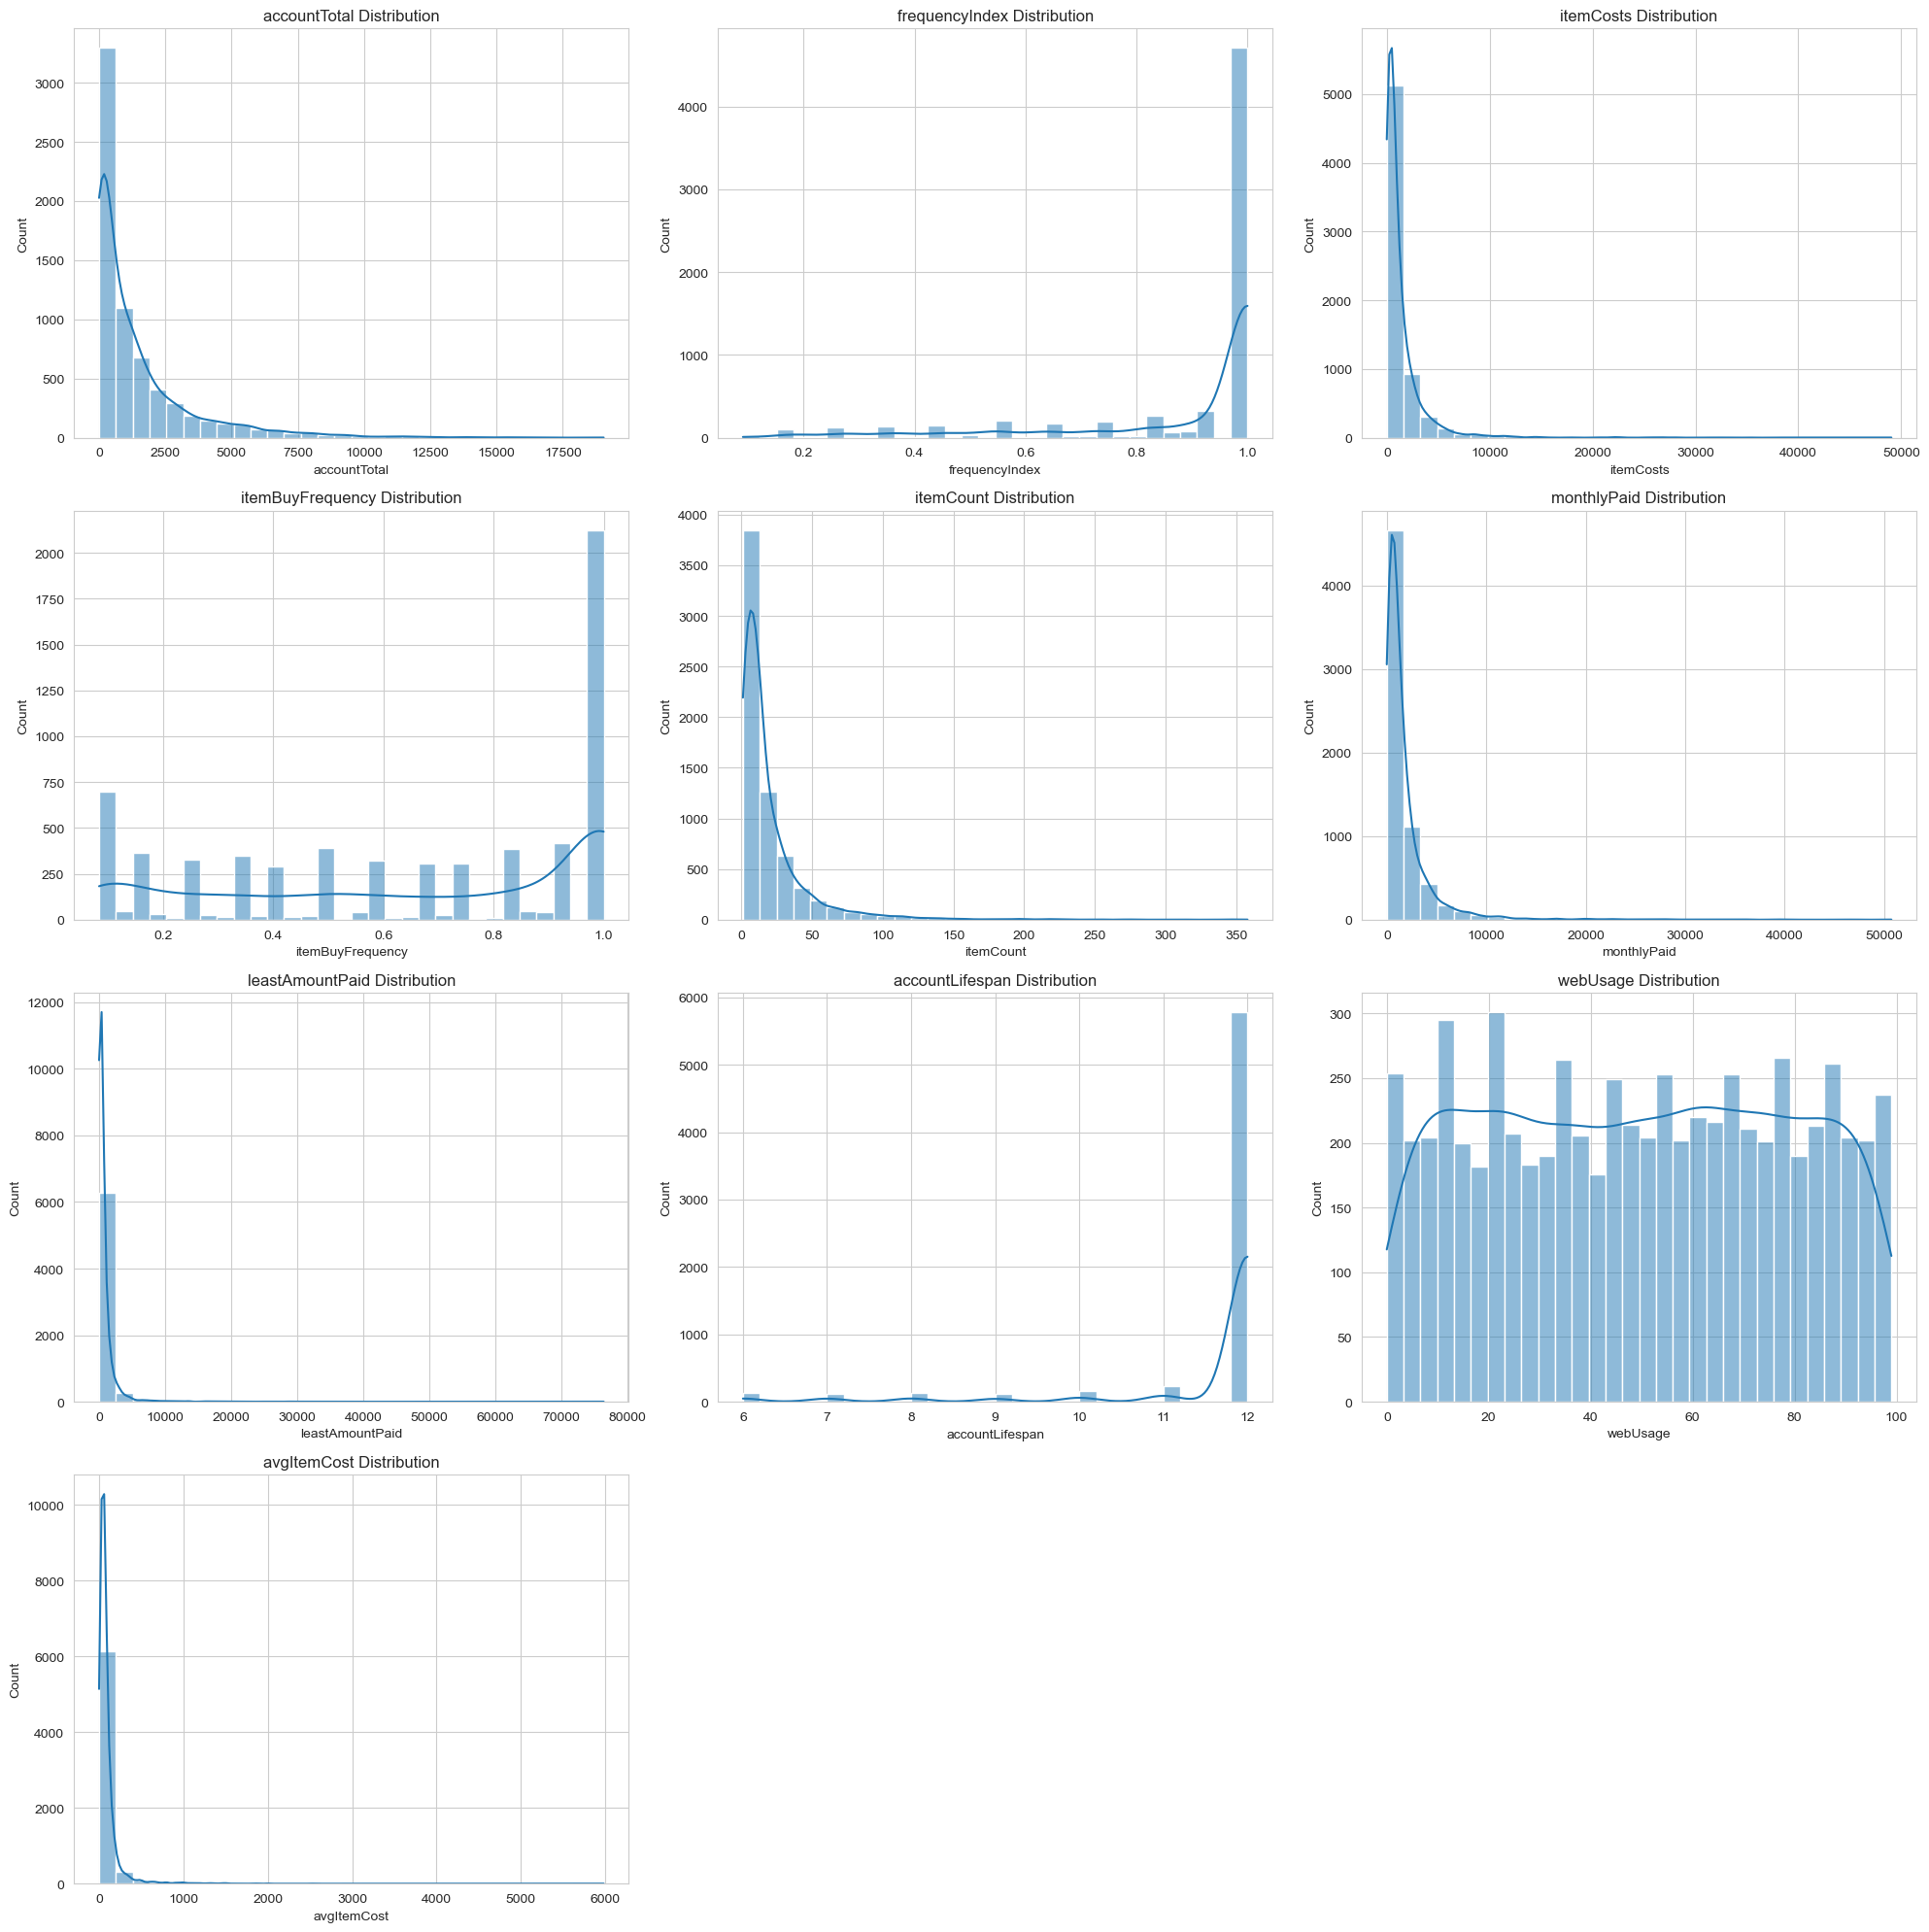

In [116]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Ceil division

# Setting up the figure
plt.figure(figsize=(20, n_rows * 5))  # Adjust size as needed

# Loop through the numerical columns and create a subplot for each
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col} Distribution")

plt.tight_layout()
plt.show()

### Some evaluation:

- **accountLifespan:** has the same value for >90% of the datasaet. We suspect that this category is simply all accounts that have a lifespan of 12+ months, regardless of how much above 12 months they are in age. We have decided not to use this variable due to it being essentially the same value for almost all rows.

- **itemBuyFrequency:** This doesn't seem to be a univariate index. While we know it's a value between 0 and 1, even by removing rows we would not expect this type of skewed distribution favoring the maximal index point. We would expect it to look more like the **webUsage Distribution** chart.

## Pair Plots

/Users/janstein/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


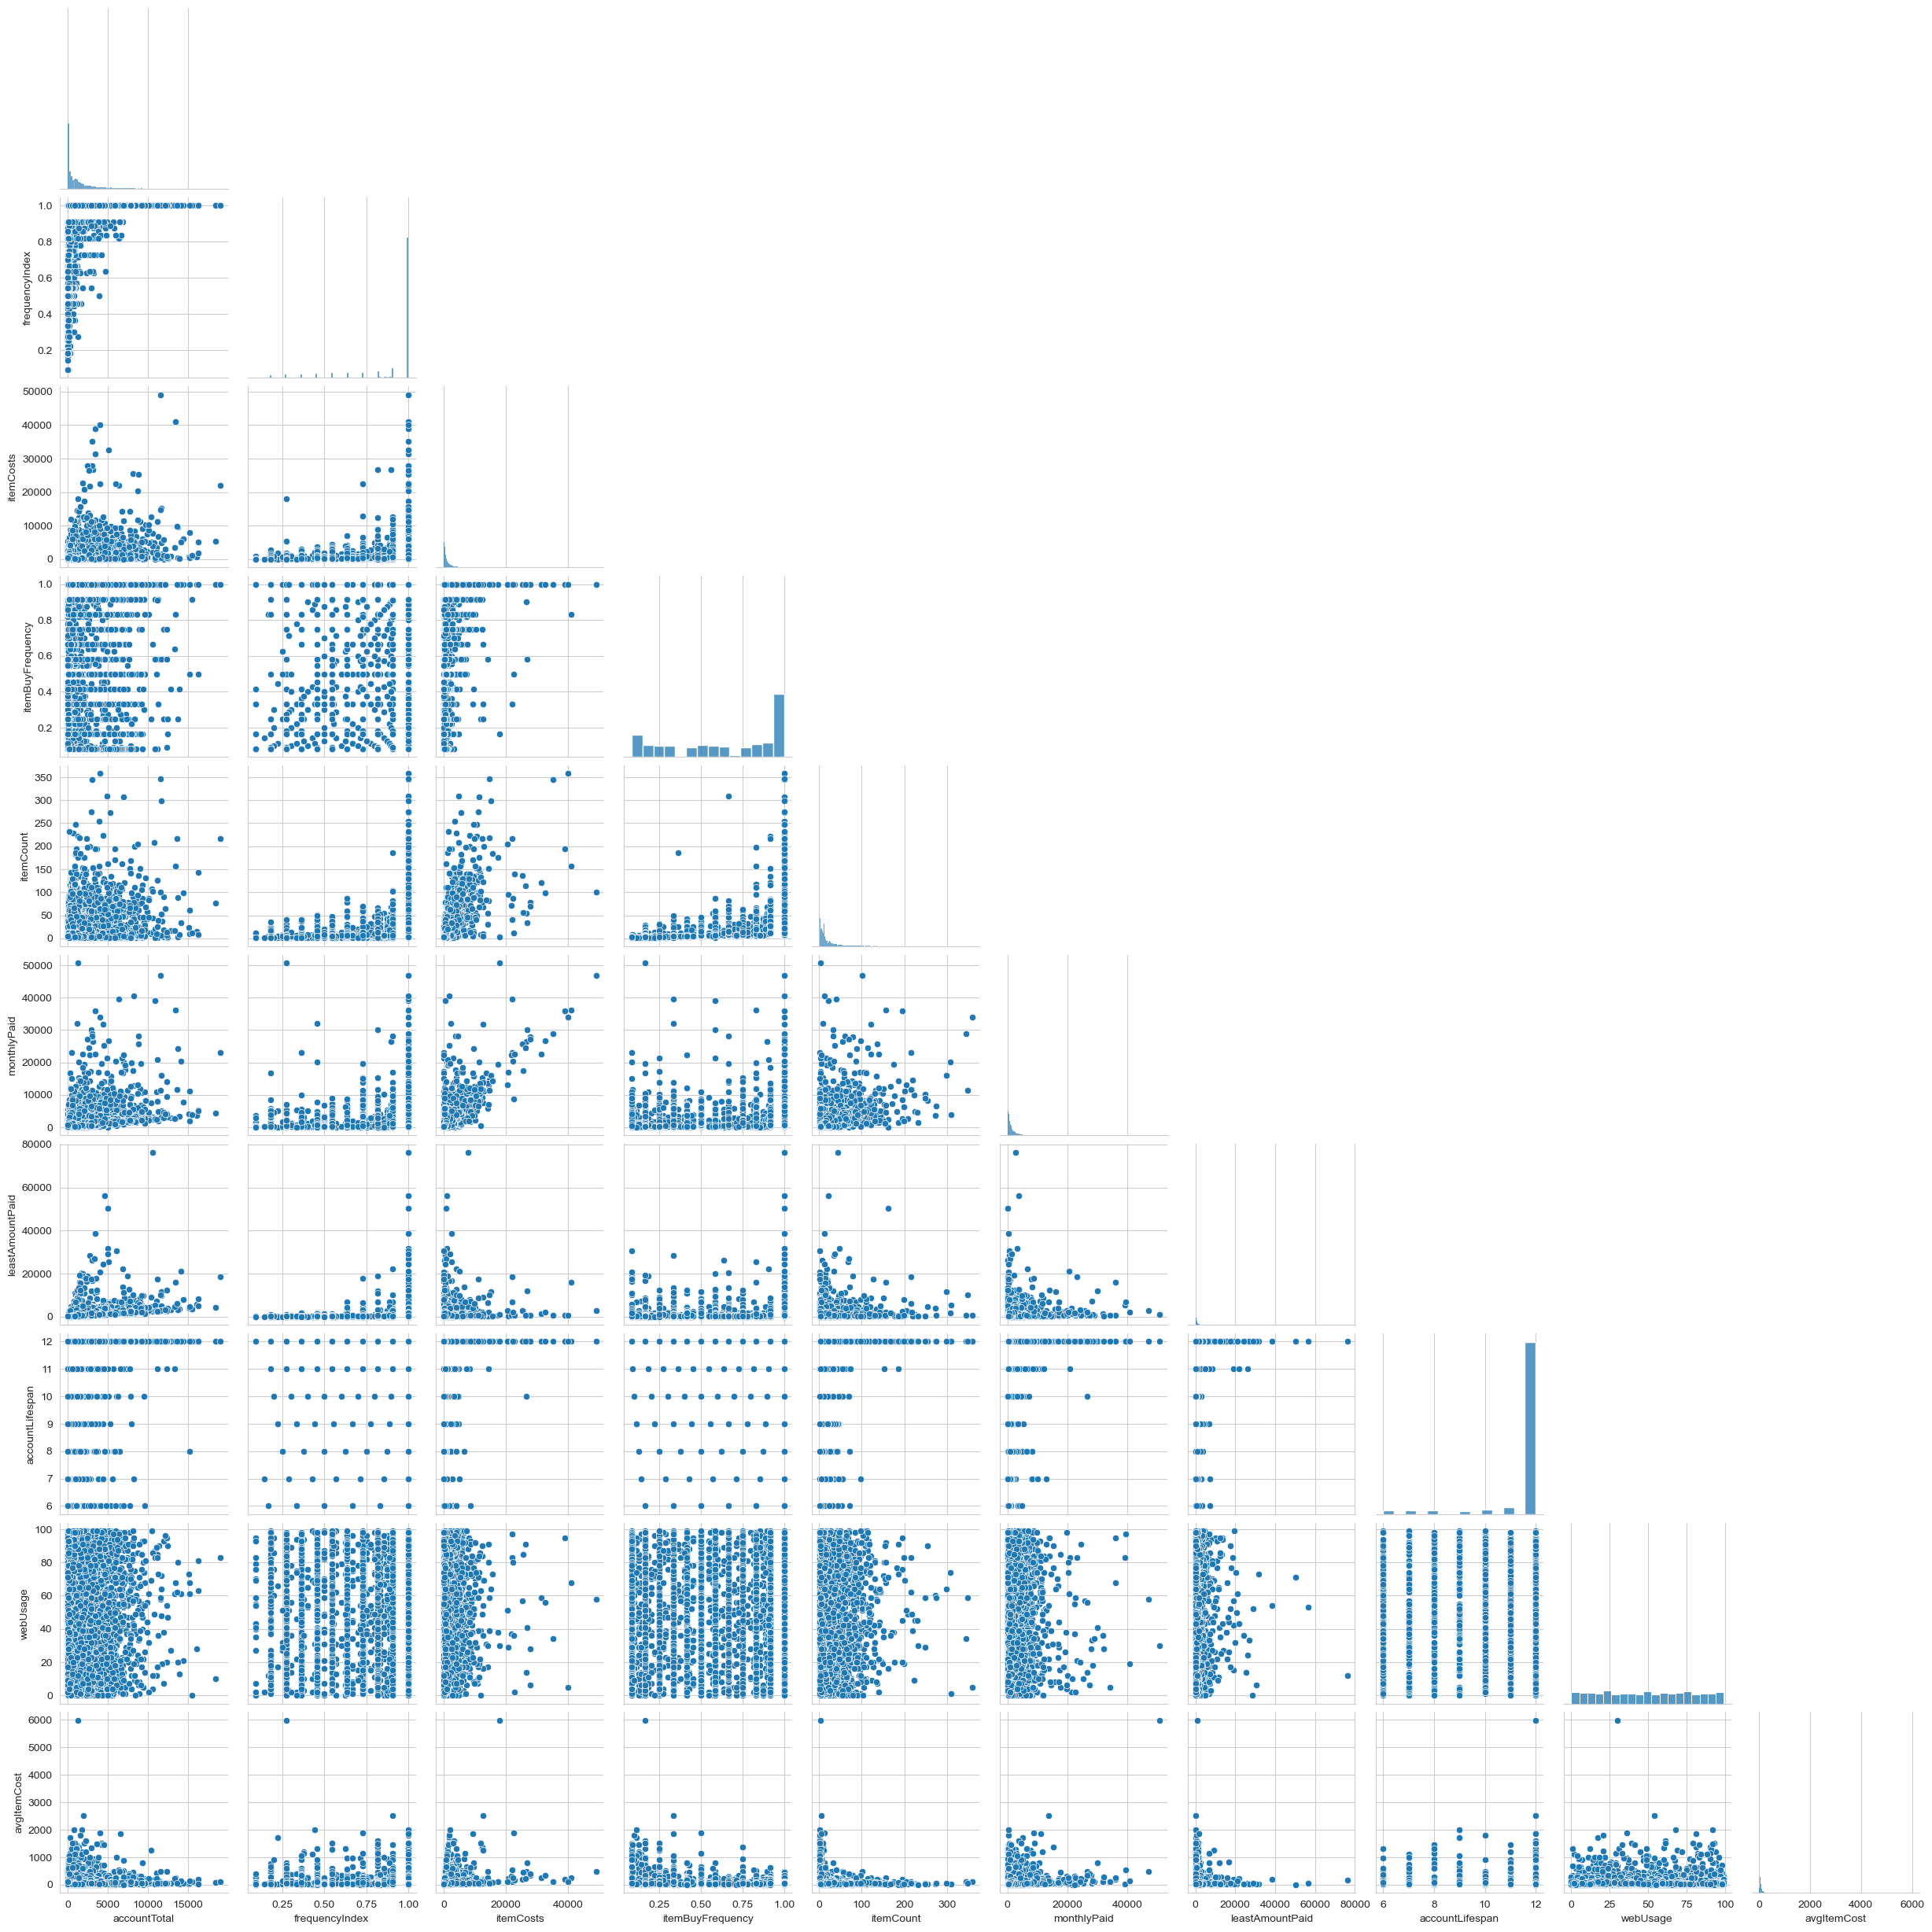

In [117]:
sns.pairplot(df, corner=True)
plt.show()

## Correlation HeatMap

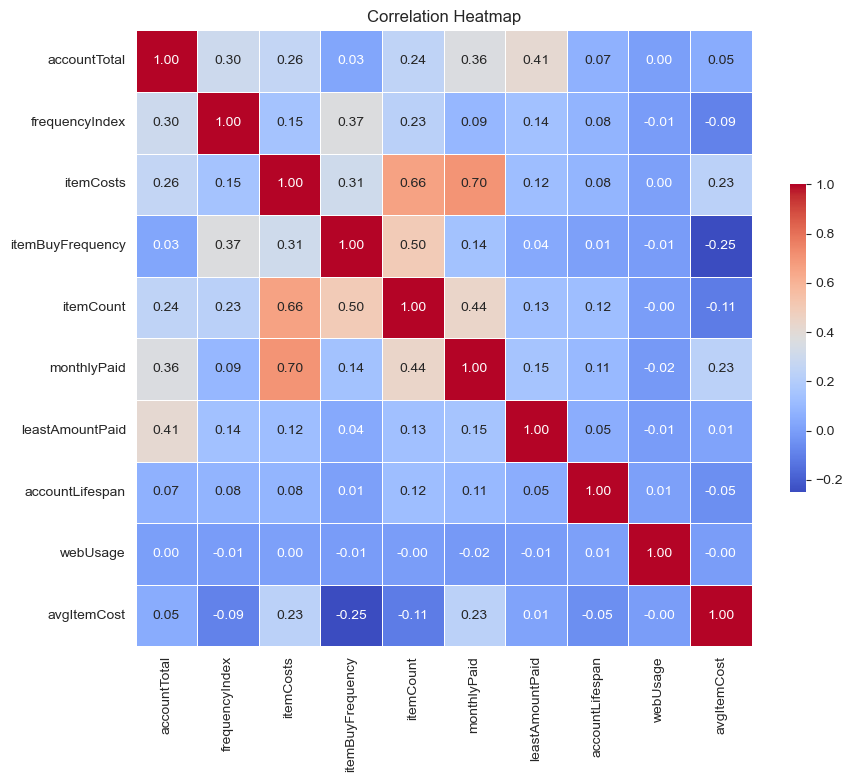

In [118]:
# Select only numerical columns for correlation
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numerical_data.corr()

# Generate a heatmap in Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)
plt.title("Correlation Heatmap")
plt.show()


# Preprocessing

### Splitting numerical from categorical variables

In [119]:
# Separate the categorical and numerical columns
categorical_cols = ['location', 'accountType']
numerical_cols = [col for col in df.columns if col not in categorical_cols]

### Encoding categorical variables

We chose to go with the pandas get_dummies function, since boolean values get counted as 0 and 1.

In [120]:
df_dummies = pd.get_dummies(df[categorical_cols])
print(df_dummies)

      location_Chicago  location_Los Angeles  location_New York  \
0                False                 False               True   
2                False                 False               True   
4                False                 False               True   
5                False                 False               True   
6                False                 False               True   
...                ...                   ...                ...   
8944              True                 False              False   
8945              True                 False              False   
8946             False                 False               True   
8948             False                  True              False   
8949              True                 False              False   

      accountType_Premium  accountType_Regular  accountType_Student  
0                    True                False                False  
2                   False                False         

### Scaling the data for visualisation

Due to the high amount of data points in our dataset, and some extreme outliers, we've chosen to scale our data earlier to better visualise the distribution in a graph

In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

df_scaled.head()

,accountTotal,frequencyIndex,itemCosts,itemBuyFrequency,itemCount,monthlyPaid,leastAmountPaid,accountLifespan,webUsage,avgItemCost
0,-0.189423,-0.288479,-0.008712,-0.421204,-0.423640,-0.532846,-0.268502,-4.479958,0.371273,0.421337
1,-0.645764,-0.361142,-0.416941,-1.652808,-0.681784,-0.533694,-0.307591,0.332513,-0.982156,1.456126
2,-0.684392,-1.887126,-0.533420,-1.406485,-0.681784,-0.573120,-0.335111,-4.479958,0.336570,-0.222406
3,-0.460063,0.510847,-0.112352,-1.406485,-0.571150,-0.217659,-0.267826,0.332513,0.232460,1.036191
4,-0.431817,-0.797137,0.558350,0.071439,-0.239251,-0.296377,-0.271718,0.332513,-0.322793,0.669843


In [122]:
print(df_scaled.shape)
print(df_dummies.shape)

(6660, 10)
(6660, 6)


### Putting the variables back together

In [123]:
# Reseting the indices of both DataFrames before concatenation to avoid introducing NaN's
df_scaled_reset = df_scaled.reset_index(drop=True)
df_dummies_reset = df_dummies.reset_index(drop=True)

# Concatenating the dummy variables with the scaled numerical data
df_final = pd.concat([df_scaled_reset, df_dummies_reset], axis=1)

# Checking for NaNs in the final DataFrame
nan_counts = df_final.isna().sum()
print(nan_counts)

accountTotal            0
frequencyIndex          0
itemCosts               0
itemBuyFrequency        0
itemCount               0
monthlyPaid             0
leastAmountPaid         0
accountLifespan         0
webUsage                0
avgItemCost             0
location_Chicago        0
location_Los Angeles    0
location_New York       0
accountType_Premium     0
accountType_Regular     0
accountType_Student     0
dtype: int64


### Type of problem & concerns with data distribution

Identifying the buying behaviour of customers through segmentation is a clustering problem, as we are trying to determine both the suitable segments as well as the appropriate segment identity of the customers in question in regards to these clusters.

To analyse the buying behaviour, we are specifically interested in the variables **'monthlyPaid'** and **'avgItemCost'**. However, these include extreme outliers, as can be seen both in the outlier plots earlier in our EDA, as well as in the difference between the 75% and max columns in the .describe() method used above.

In order to better analyse the relationship of the larger customer group, we are considering to cut out customers where these values are above 2 standard deviations in either or both of these values. Customers who end up in these extreme localities will instead be offered special services from a Customer Relations manager on an individual basis because it is difficult to generalize from outliers and their existence could seriously hamper the functionality of algorithms used to analyse the dataset.

**We continue with analysing the impact this would have on our dataset**

In [124]:
# Create conditions for values greater than 5
condition = (df_final['monthlyPaid'] > 3) | (df_final['avgItemCost'] > 3)

# Count the number of rows satisfying either condition
count = condition.sum()

print(f"Number of rows with 'monthlyPaid' or 'avgItemCost' greater than 3: {count}")

Number of rows with 'monthlyPaid' or 'avgItemCost' greater than 3: 221


**Due to the relativel small amount (221) of customers that this affects, we chose to proceed with the intended cut-off. This elmininates the top ~3.3% of customers from our investigation**

In [125]:
df_filtered = df_final[~condition]

# Re-checking the distributions after filtering
df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
accountTotal,6439.0,-0.031741,0.951643,-0.693215,-0.648580,-0.391340,0.152548,8.312549
frequencyIndex,6439.0,0.002061,0.998723,-3.849104,0.074852,0.510847,0.510847,0.510847
itemCosts,6439.0,-0.074609,0.633140,-0.557321,-0.454330,-0.311728,0.046596,5.453812
itemBuyFrequency,6439.0,0.014967,0.989610,-1.652808,-0.913846,0.317758,1.056720,1.056720
itemCount,6439.0,-0.028792,0.888039,-0.681784,-0.534273,-0.276129,0.129526,10.676550
monthlyPaid,6439.0,-0.099126,0.574495,-0.613413,-0.470221,-0.304516,0.035794,2.947086
leastAmountPaid,6439.0,-0.013560,0.983598,-0.358693,-0.288526,-0.255290,-0.034838,32.933788
accountLifespan,6439.0,0.002165,0.997620,-4.479958,0.332513,0.332513,0.332513,0.332513
webUsage,6439.0,0.001874,0.999607,-1.710925,-0.878046,0.024240,0.857120,1.724702
avgItemCost,6439.0,-0.106495,0.447490,-0.566839,-0.368504,-0.238120,-0.021671,2.998915


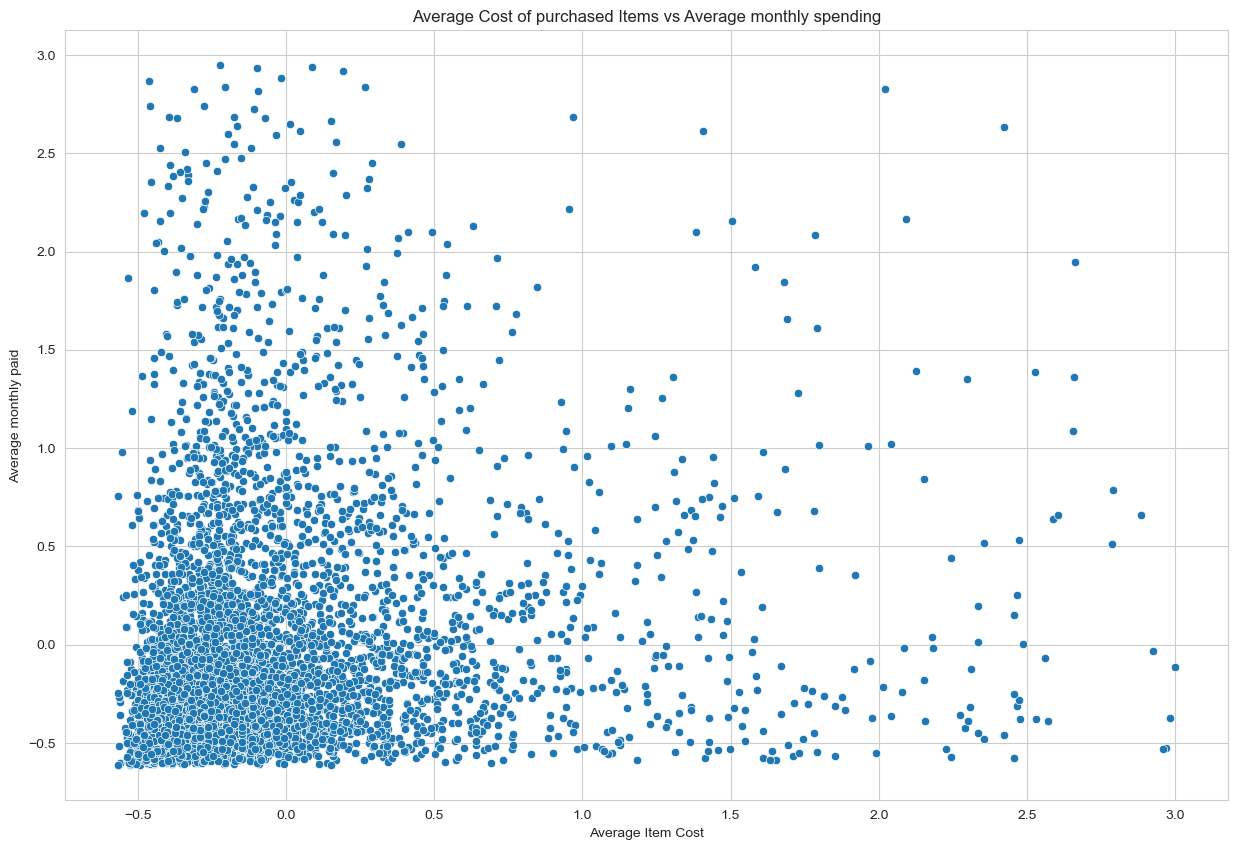

In [126]:
plt.figure(figsize=(15, 10)) 
sns.scatterplot(data=df_filtered, x='avgItemCost', y='monthlyPaid')
plt.title('Average Cost of purchased Items vs Average monthly spending')
plt.xlabel('Average Item Cost')
plt.ylabel('Average monthly paid')
plt.show()

### Some Conclusions

We are left with a much more managable dataset that is starting to show some patterns. Just from looking at it, we can see that while the majority of customers are centered around the mean 0 (as expected), there seems to be a considerable distinction between customers who have high monthly spending because of expensive items, and customers who buy expensive items but a lot less frequently.

# Doing ML & AI Stuff

### Dropping excess variables that are not avgItemCost or monthlyPaid

In [129]:
col_to_keep = ['avgItemCost', 'monthlyPaid']
df_cluster = df_filtered[col_to_keep]

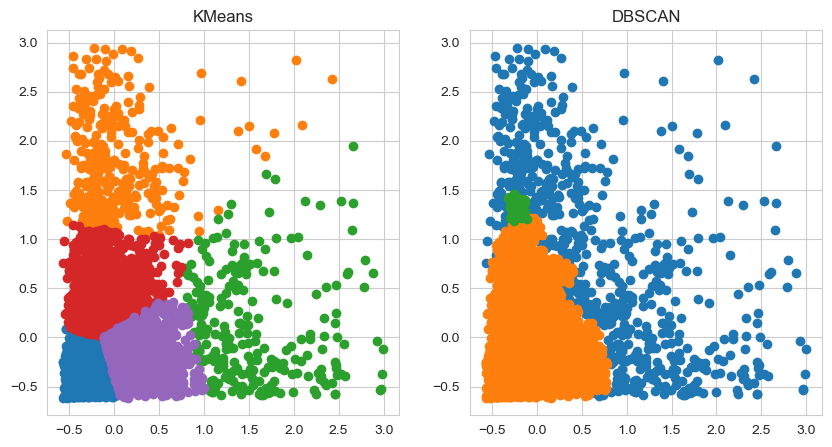

In [134]:
from sklearn.cluster import KMeans, DBSCAN

clustering_methods = [(KMeans, {'n_clusters': 5, 'n_init': 'auto', 'init': 'k-means++'}),
                      (DBSCAN, {'eps': 0.1, 'min_samples': 20})]

n_clusters = len(clustering_methods)
size_ax = 5
fig, axs = plt.subplots(1, n_clusters, figsize = (n_clusters * size_ax, size_ax))

X_cluster = df_cluster.to_numpy()

for i, (clustering_method, kwargs) in enumerate(clustering_methods):
    method = clustering_method(**kwargs)
    y = method.fit_predict(X_cluster)
    unique_labels = np.unique(y)

    for label in unique_labels:
        axs[i].scatter(X_cluster[y== label,0],X_cluster[y== label,1])
        axs[i].set_title(clustering_method.__name__)